# Algorithms for unconstrained nonlinear optimization. First- and second- order methods

-----

## Goal
The use of first- and second-order methods (Gradient Descent, Conjugate Gradient
Descent, Newton’s method and Levenberg-Marquardt algorithm) in the tasks of
unconstrained nonlinear optimization

-----

## Problems and methods

Generate random numbers α ∈ (0,1) and β ∈ (0,1). Furthermore, generate the
noisy data {x k , y k }, where k = 0, ... ,100, according to the following rule:
y k = αx k + β + δ k ,
x k =
k
,
100
where δ k ~N(0,1) are values of a random variable with standard normal
distribution. Approximate the data by the following linear and rational functions:
1. F(x, a, b) = ax + b (linear approximant),
2. F(x, a, b) =
a
1+bx
(rational approximant),
by means of least squares through the numerical minimization (with precision ε =
0.001) of the following function:
100
D(a, b) = ∑(F (x k , a, b) − y k ) 2 .
k=0
To solve the minimization problem, use the methods of Gradient Descent, Conjugate
Gradient Descent, Newton’s method and Levenberg-Marquardt algorithm. If
necessary, set the initial approximations and other parameters of the methods.
Visualize the data and the approximants obtained separately for each type of
approximant. Analyze the results obtained (in terms of number of iterations,
precision, number of function evaluations, etc.) and compare them with those from
Task 2 for the same dataset.

-----

## Content

### Part 1 : define functions and gradient descent implementation
### Part 2 : other methods
### Part 3 : visualization 

------


In [1]:
'''
    import lib 
'''
import os 
import math  
import random 
import numpy as np 
import pandas as pd 
from scipy import optimize
from scipy.optimize import least_squares as ls
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.animation as animation

### Part 1 : define functions and gradient descent implementation

In [110]:
def  linear_approx(param,x) : 
    a,b= param[0],param[1]
    return a*x+b

def  rational_approx(param,x) : 
    a,b= param[0],param[1]
    return a/(1+b*x)

def least_squares(param,X,Y,func='rational') :
    values = [(func_list[func](param,x)-y)**2 for x,y in zip(X,Y)  ]
    error = sum(values) 
    return error


ValueError: Jacobian is required for Newton-CG method

In [107]:
EPS = 0.0001
save_dir = '/home/ki/Downloads/'


    

def grad_linear_a(a,b,x) : 
    
    return x  
    

def grad_linear_b (a,b,x) : 
    return 1
    

def grad_rational_a(a,b,x) :
    
    return 1/(1+b*x) 

def grad_rational_b(a,b,x) : 

    return a*( (-1*x)/((1+b*x)**2))

def jacobian_rational(param,X,Y):
    a,b = param[0],param[1]
    tmp = np.array([(2*grad_rational_a(a,b,x))*(func_list['rational']([a,b],x)-y) for x,y in zip(X,Y)  ])
    gda= np.sum(tmp)
    
    tmp = np.array([(2*grad_rational_b(a,b,x))*(func_list['rational']([a,b],x)-y) for x,y in zip(X,Y)  ])
    gdb = np.sum(tmp)
    
    jac = np.array([gda, gdb])
    return jac 

def jacobian_linear(param,X,Y):
    a,b = param[0],param[1]
    tmp = np.array([(2*grad_linear_a(a,b,x))*(func_list['linear']([a,b],x)-y) for x,y in zip(X,Y)  ])
    gda= np.sum(tmp)
    
    tmp = np.array([(2*grad_linear_b(a,b,x))*(func_list['linear']([a,b],x)-y) for x,y in zip(X,Y)  ])
    gdb = np.sum(tmp)
    
    jac = np.array([gda, gdb])
    return jac 

def gradient_descent_rational(X,Y,interval=[-1,1]) :
    alpha = 0.0005
    f_x = 0 
    f_x_prev = 10e6
    a=0.5
    b=1
    itr = 0 
    to_save = { 'min_a' :[],'min_b' : [], 'min_f_x' : []}
    while abs (f_x - f_x_prev) >=EPS :
        itr+=1
        #update a 
        tmp = np.array([(2*grad_rational_a(a,b,x))*(func_list['rational']([a,b],x)-y) for x,y in zip(X,Y)  ])
        gd = np.sum(tmp)
        a = a -  alpha * gd 
        
        #update b 
        tmp = np.array([(2*grad_rational_b(a,b,x))*(func_list['rational']([a,b],x)-y) for x,y in zip(X,Y)  ])
        gd = np.sum(tmp)
        b = b -  alpha * gd 
        
        f_x_prev= f_x 
        f_x= least_squares([a,b],X,Y)
        #print(f_x)
        #print([a,b])
        to_save['min_a'].append(a)
        to_save['min_b'].append(b)
        to_save['min_f_x'].append(least_squares([a,b],X,Y,'rational'))
    to_save_df =pd.DataFrame(data=to_save)    
    full_name =os.path.join(save_dir, 'gradient_descent_rational.csv')  
    print(full_name)
    to_save_df.to_csv(full_name) 
    return [a,b],itr


def gradient_descent_linear(X,Y,interval=[-1,1]) :
    alpha = 0.001
    f_x = 0 
    f_x_prev = 10e6
    a=2
    b=3
    itr = 0 
    to_save = { 'min_a' :[],'min_b' : [], 'min_f_x' : []}
    while abs (f_x - f_x_prev) >=EPS :
        itr+=1
        #update a 
        tmp = np.array([(2*grad_linear_a(a,b,x))*(func_list['linear']([a,b],x)-y) for x,y in zip(X,Y)  ])
        gd = np.sum(tmp)
        a = a -  alpha * gd 
        
        #update b 
        tmp = np.array([(2*grad_linear_b(a,b,x))*(func_list['linear']([a,b],x)-y) for x,y in zip(X,Y)  ])
        gd = np.sum(tmp)
        b = b -  alpha * gd 
        
        f_x_prev= f_x 
        f_x= least_squares([a,b],X,Y)
        #print(f_x)
        #print([a,b])
        to_save['min_a'].append(a)
        to_save['min_b'].append(b)
        to_save['min_f_x'].append(least_squares([a,b],X,Y,'linear'))
    to_save_df =pd.DataFrame(data=to_save)    
    full_name =os.path.join(save_dir, 'gradient_descent_linear.csv')  
    print(f_x)
    to_save_df.to_csv(full_name) 
    return [a,b],itr

func_list = {  
  'linear' : lambda param,x : linear_approx(param,x),
    'rational': lambda param,x : rational_approx(param,x)
}
       

In [4]:
'''
    generate data 
'''
a =random.random()
b=random.random()
delta =np.random.normal(size=100)
X = [k/100 for k in range(100)]
Y = [a*x_k+b+delta_k for x_k,delta_k in zip(X,delta)]

In [108]:
res,itrations = gradient_descent_rational(X,Y)
print(res, itrations)

/home/ki/Downloads/gradient_descent_rational.csv
[0.5607142098874845, -0.45136354384905436] 537


In [111]:
inital_param = [1.0 , 0.5 ]
res = optimize.minimize(least_squares, inital_param,  args = (X,Y),method="CG")  
print(res)

     fun: 107.65194505516085
     jac: array([1.90734863e-06, 9.53674316e-07])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 10
    njev: 28
  status: 0
 success: True
       x: array([ 0.55418353, -0.46309942])


In [117]:
inital_param = [0.5 ,1.5]
res = optimize.minimize(least_squares,inital_param, args = (X,Y),method='Newton-CG',jac=jacobian_rational)
print(res)

     fun: 107.65194505516084
     jac: array([ 1.28589138e-05, -2.40704775e-05])
 message: 'Optimization terminated successfully.'
    nfev: 18
    nhev: 0
     nit: 14
    njev: 52
  status: 0
 success: True
       x: array([ 0.5541835 , -0.46309946])


In [119]:
inital_param = [0.4 , 0.5 ]
err_func = lambda param,XX,YY :[(linear_approx(param,x)-y)**2 for x,y in zip(XX,YY)] 
res = ls(err_func,inital_param ,args = (X,Y),method='lm')
print(res)

 active_mask: array([0, 0])
        cost: 149.37621113242838
         fun: array([5.77884220e-01, 2.01210959e+00, 1.28587728e-02, 6.85960081e+00,
       3.56098697e+00, 7.39498112e-02, 7.43314909e-01, 1.43107704e+00,
       1.05378230e-01, 1.60451541e+00, 2.42074500e-02, 1.37440426e+00,
       4.30461207e-03, 6.39645572e-01, 5.70247964e-03, 2.47672695e-01,
       2.09498400e-01, 5.66510928e+00, 1.32879859e-01, 8.32118032e-01,
       2.12500308e-02, 1.88312405e-01, 1.10089935e-01, 7.98992927e-01,
       2.88052360e+00, 1.09826802e+00, 5.55976002e+00, 1.00897194e+00,
       3.61315663e-01, 4.25387365e-03, 4.12882698e-01, 1.40829749e+00,
       2.85072561e-02, 1.92010398e-01, 2.48108994e+00, 1.73007946e+00,
       1.77733576e+00, 4.54471972e-01, 7.49928720e-03, 1.03758572e-01,
       1.99579509e+00, 5.44666232e+00, 1.08617115e-01, 4.20563799e-01,
       1.63928540e-01, 1.95209501e+00, 2.05584689e-03, 4.35645092e-04,
       2.84621034e-02, 1.77104061e+00, 3.44569309e+00, 3.15715209e+00,
  

## Visualization

<ipython-input-120-f96ccfa23817>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


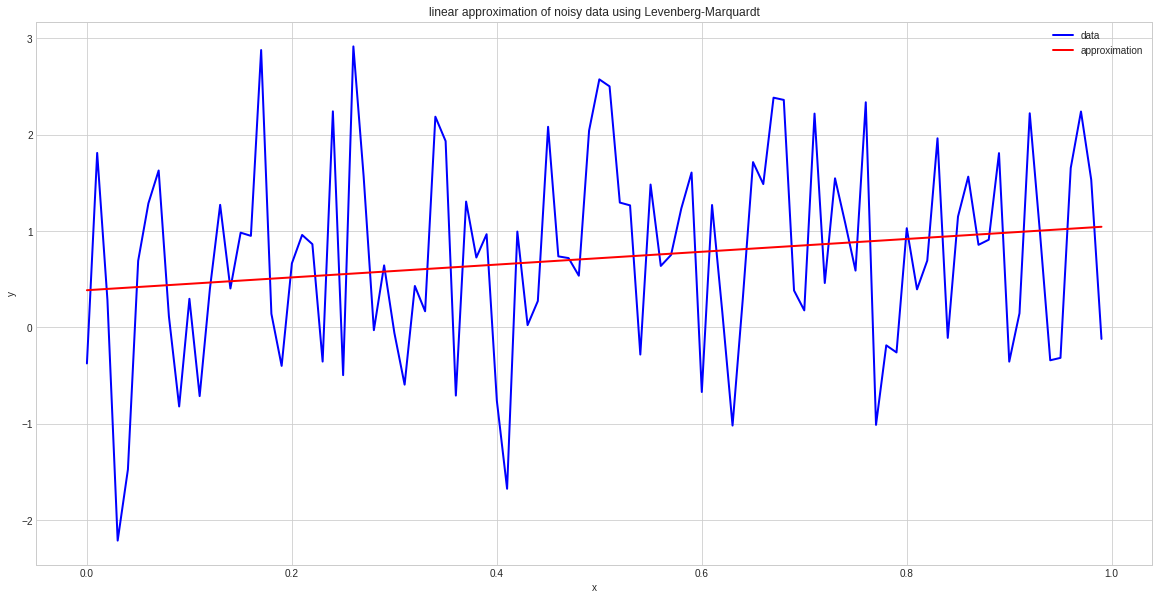

In [120]:
Approx_y = [linear_approx(res.x,x) for x in X]
fig = plt.figure(figsize=(20,10))
plt.title("linear approximation of noisy data using Levenberg-Marquardt")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.axes()

ax.plot(X,Y,color='blue', label='data',linewidth=2)
ax.plot(X,Approx_y,color='red', label='approximation',linewidth=2)
plt.legend();

MovieWriter ffmpeg unavailable; using Pillow instead.


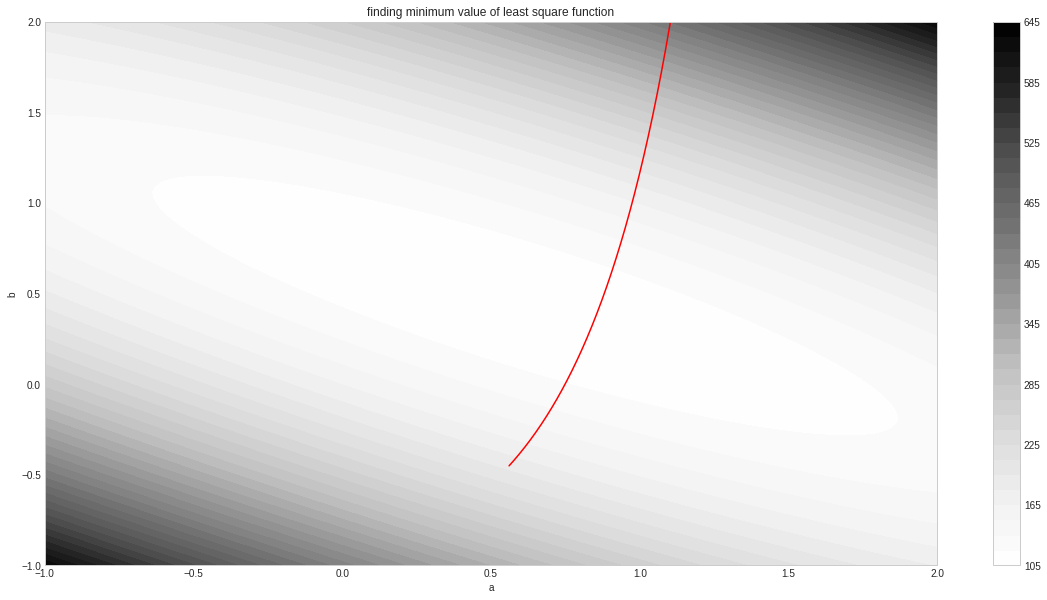

In [101]:
func='linear'

xlist = np.linspace(-1, 2, 100)
ylist = np.linspace(-1, 2, 100)
A, B = np.meshgrid(xlist, ylist)
Z = [least_squares([a,b],X,Y,func=func) for a,b in zip(A,B)] 

fig,ax=plt.subplots(1,1,figsize=(20,10))
cp = ax.contourf(A, B, Z,levels=50)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('finding minimum value of least square function')
ax.set_xlabel('a')
ax.set_ylabel('b')

full_name =os.path.join(save_dir, 'gradient_descent_rational.csv') 
df = pd.read_csv(full_name)
data = np.array([df['min_a'],df['min_b']])

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

l, = plt.plot([], [], 'r-')
line_ani = animation.FuncAnimation(fig, update_line, data.shape[1], fargs=(data, l),
                                   interval=100, blit=True)
line_ani.save(os.path.join(save_dir, 'gradient_descent_rational.gif'))



plt.show()